In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed
# For datasets, use !kaggle datasets download -d dataset-owner/dataset-name

!unzip traffic-signs-preprocessed.zip -d traffic-sign
# Adjust the file name and directory as necessary


Dataset URL: https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed
License(s): other
100% 4.16G/4.16G [03:14<00:00, 24.3MB/s]
100% 4.16G/4.16G [03:14<00:00, 23.0MB/s]
Archive:  traffic-signs-preprocessed.zip
  inflating: traffic-sign/data0.pickle  
  inflating: traffic-sign/data1.pickle  
  inflating: traffic-sign/data2.pickle  
  inflating: traffic-sign/data3.pickle  
  inflating: traffic-sign/data4.pickle  
  inflating: traffic-sign/data5.pickle  
  inflating: traffic-sign/data6.pickle  
  inflating: traffic-sign/data7.pickle  
  inflating: traffic-sign/data8.pickle  
  inflating: traffic-sign/datasets_preparing.py  
  inflating: traffic-sign/label_names.csv  
  inflating: traffic-sign/labels.pickle  
  inflating: traffic-sign/mean_image_gray.pickle  
  inflating: traffic-sign/mean_image_rgb.pickle  
  inflating: traffic-sign/std_gray.pickle  
  inflating: traffic-sign/std_rgb.pickle  
  inflating: traffic-sign/test.pickle  
  inflating: traffic-sign/train.pickle

In [3]:
data = 'traffic-sign/'
TRAIN_LINK = data + 'train.pickle'
VALID_LINK = data + 'valid.pickle'
TEST_LINK = data + 'test.pickle'

In [24]:
import pickle

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import tensorflow as tf

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten


In [5]:
with open(TRAIN_LINK, mode="rb") as f:
  train = pickle.load(f)

with open(VALID_LINK, mode="rb") as f:
  valid = pickle.load(f)

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)
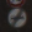

In [11]:
trainX = train["features"]
trainY = train["labels"]

validX = valid["features"]
validY = valid["labels"]

trainX[0]


In [7]:
trainY[0]


41

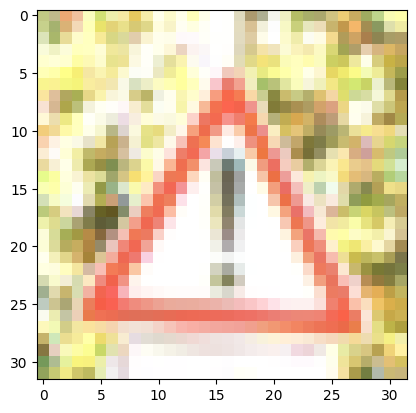

In [9]:
trainX, trainY = shuffle(trainX,trainY)
plot.imshow(trainX[0])


In [12]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0

In [15]:
trainX.shape

(34799, 32, 32, 3)

In [13]:
trainY = to_categorical(trainY)
validY = to_categorical(validY)
validY.shape

(4410, 43)

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",   activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [29]:
# grader-required-cell

# Define a Callback class that stops training once accuracy reaches 99.9%

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [40]:
callbacks = myCallback()

history = model.fit(trainX,
              trainY,
              verbose = 1,
              batch_size=64,
              epochs=20,
              callbacks=callbacks,
              validation_data=(validX, validY))

Epoch 1/20
544/544 [==============================] - 7s 9ms/step - loss: 0.8365 - accuracy: 0.7598 - val_loss: 0.2906 - val_accuracy: 0.9313
Epoch 2/20
544/544 [==============================] - 4s 6ms/step - loss: 0.0801 - accuracy: 0.9774 - val_loss: 0.2002 - val_accuracy: 0.9492
Epoch 3/20
544/544 [==============================] - 4s 7ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.1605 - val_accuracy: 0.9605
Epoch 4/20
544/544 [==============================] - 4s 7ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.1584 - val_accuracy: 0.9642
Epoch 5/20
544/544 [==============================] - 4s 7ms/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.0906 - val_accuracy: 0.9771
Epoch 6/20
544/544 [==============================] - 4s 7ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.1475 - val_accuracy: 0.9723
Epoch 7/20
544/544 [==============================] - 4s 7ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.2458 - val_accuracy: 0.9723
Epoch 

<ipython-input-43-76d15d0f120f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


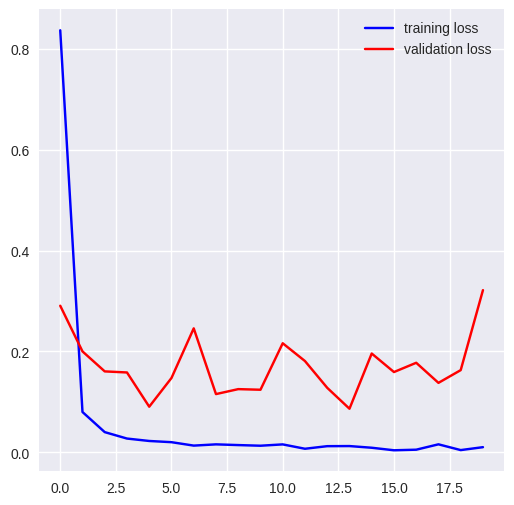

<Figure size 800x550 with 0 Axes>

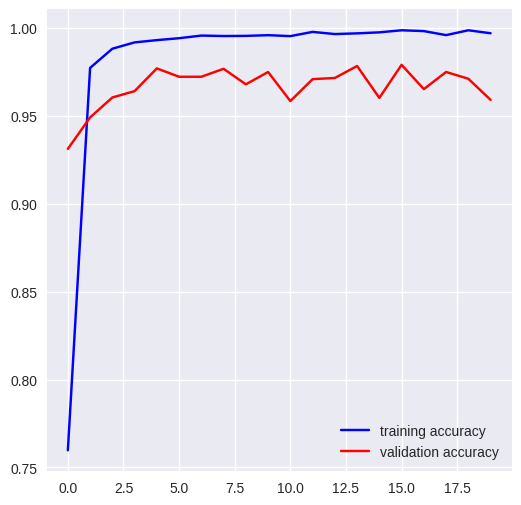

In [43]:
#Evaluation
plt.style.use('seaborn')
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], color='b', label="training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], color='b', label="training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="validation accuracy")
plt.legend()
plt.show()

In [44]:
model.save("traffic-sign-cnn.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd

In [51]:
df = pd.read_csv("traffic-sign/label_names.csv")
df


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [45]:
labels = np.asarray(df["SignName"])
with open(TEST_LINK, mode="rb") as f:
  test = pickle.load(f)

testX = test["features"]
testY = test["labels"]
testX = testX.astype("float") / 255.0
testY = to_categorical(testY)

In [46]:
testX

array([[[[0.45490196, 0.54509804, 0.68235294],
         [0.45490196, 0.5372549 , 0.67058824],
         [0.4627451 , 0.54117647, 0.6745098 ],
         ...,
         [0.38431373, 0.44705882, 0.56078431],
         [0.38039216, 0.4745098 , 0.57647059],
         [0.33333333, 0.41176471, 0.50980392]],

        [[0.45098039, 0.55686275, 0.69019608],
         [0.45098039, 0.54901961, 0.68235294],
         [0.45882353, 0.55294118, 0.68627451],
         ...,
         [0.46666667, 0.56078431, 0.69019608],
         [0.47058824, 0.55294118, 0.67843137],
         [0.47058824, 0.54509804, 0.67058824]],

        [[0.45882353, 0.55294118, 0.68235294],
         [0.45882353, 0.55686275, 0.68627451],
         [0.44705882, 0.54901961, 0.6745098 ],
         ...,
         [0.47058824, 0.56470588, 0.70196078],
         [0.47843137, 0.56470588, 0.70196078],
         [0.47058824, 0.56078431, 0.69411765]],

        ...,

        [[0.45882353, 0.5372549 , 0.65490196],
         [0.45098039, 0.5254902 , 0.64313725]

In [47]:
model.evaluate(testX, testY)


395/395 [==============================] - 2s 5ms/step - loss: 0.2912 - accuracy: 0.9614


[0.29120782017707825, 0.961361825466156]

In [48]:
testIdx = 19
p = model.predict(testX[testIdx:testIdx+1])
idx = np.argmax(p, axis=1)

1/1 [==============================] - 0s 481ms/step


prediction : [38] Keep right
actual:  38 Keep right


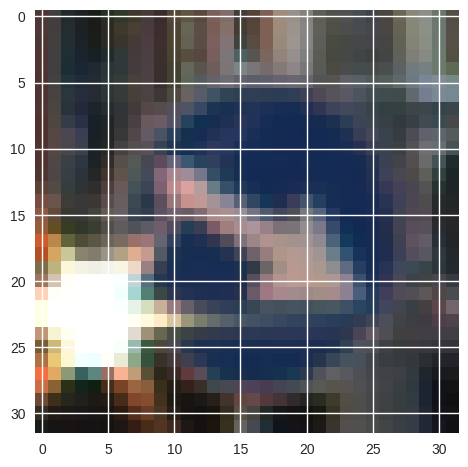

In [50]:
plt.imshow(testX[testIdx])
print("prediction :", idx, labels[idx][0])
print("actual: ",np.argmax(np.asarray(testY[testIdx])), labels[np.argmax(np.asarray(testY[testIdx]))])

In [57]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Load the model
model = load_model('traffic-sign-cnn.h5')

# Path to the image to be classified
img_path = '/content/download.png'

# Preprocess the image
preprocessed_img = preprocess_image(img_path)

# Make a prediction
predictions = model.predict(preprocessed_img)


# If the model has a softmax output layer, it will return probabilities
predicted_class = np.argmax(predictions, axis=1)

# Output the result
print(f'Predicted class: {predicted_class}, {labels[predicted_class][0]}')


1/1 [==============================] - 0s 85ms/step
Predicted class: [14], Stop
